In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse

from ripser import ripser
from persim import PersImage
from persim import plot_diagrams

In [10]:
# import custom functions
from TDA_helper_fcns import load_data, plot_gests, sublevel_set_time_series_dist
from gen_all_pds import plot_ts_pd

In [11]:
sd = load_data(subjects=["01", "21", "19", "10", "35"])

In [15]:
tst = sd["01"]["1_0_2"][:, 3]

tst_d = sublevel_set_time_series_dist(tst)
tst_ts = np.c_[sd["01"]["1_0_2"][:, 0], tst]

tst_pd = ripser(tst_d, distance_matrix=True)

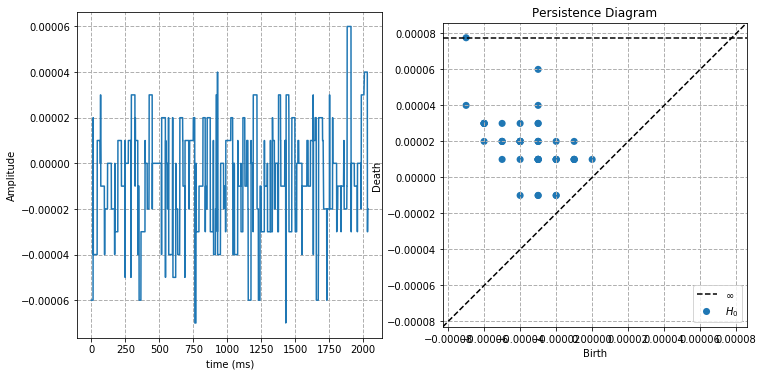

In [16]:
plot_ts_pd(tst_ts, tst_pd)

In [17]:
# convert to (birth, persistence) coord system
tst_pd["dgms"] = tst_pd["dgms"][0][:-1, :] # remove inf
tst_bp = np.c_[tst_pd["dgms"][:, 0], tst_pd["dgms"][:, 1] - tst_pd["dgms"][:, 0]]

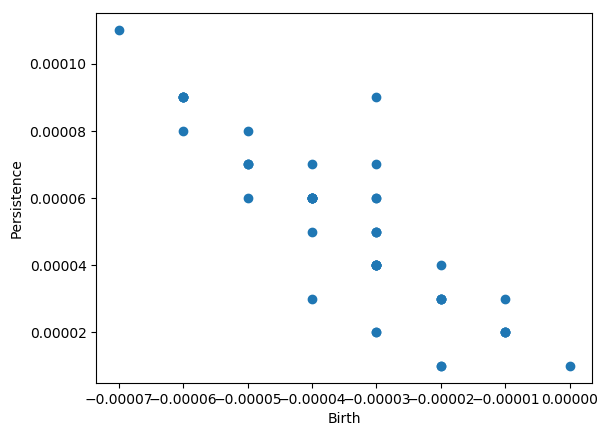

In [18]:
# plot new coord system
plt.plot(tst_bp[:, 0], tst_bp[:, 1], "o")
plt.xlabel("Birth")
plt.ylabel("Persistence")
plt.show()

In [19]:
# vectorize pd in (0.00001 by 0.00001) buckets
def bucket_pd(pd, b_bkt, p_bkt):
    """
    vectorize persistence diagram by "bucketing" pixel squares
    pd is persistence diagram array from ripser object; assumes removed inf
    b_bkt - size of bucket along birth (x) axis
    p_bkt - size of bucket along persistence (y) axis
    """
    num_brth_bkts = (max(pd[:, 0]) - min(pd[:, 0])) // 1e-5
    brth_bkts = np.linspace(
        start=min(pd[:, 0]),
        stop=max(pd[:, 0]),
        num=num_brth_bkts
    )
    
    num_pers_bkts = (max(pd[:, 0]) - min(pd[:, 0])) // 1e-5
    pers_bkts = np.linspace(
        start=min(pd[:, 0]),
        stop=max(pd[:, 0]),
        num=num_pers_bkts
    )
    
    # output array
    res = np.zeros(num_brth_bkts * num_pers_bkts)
    
    # how best to sort coords into buckets...
    for i in pd.shape[0]:
        for j in pd.shape[1]:
            pd[i, j]
        
        

In [24]:
?np.linspace

In [30]:
brth_bkts = np.linspace(
        start=min(tst_bp[:, 0]),
        stop=max(tst_bp[:, 0]),
        num=(max(tst_bp[:, 0]) - min(tst_bp[:, 0])) // 1e-5
    )

In [31]:
brth_bkts

array([-7.00000019e-05, -5.83333349e-05, -4.66666679e-05, -3.50000009e-05,
       -2.33333340e-05, -1.16666670e-05,  0.00000000e+00])